In [4]:
from std_methods import std_methods

tickers = ['AAPL','JPM','F','PG', 'BA']

equal_weights,min_risk,risk_parity = std_methods(tickers,'1992-01-01','2022-18-31','2023-01-01','2023-12-31')

[7.95985831e-12 3.45395956e-11 9.47447097e-01 5.09396416e-02
 1.61326095e-03]
[0.02270654 0.0285299  0.9138212  0.03045487 0.00448748]


In [5]:
import matplotlib.pyplot as plt
from stable_baselines3.common.base_class import BaseAlgorithm
from stable_baselines3.common.vec_env import VecEnv
import numpy as np

investment_period = 1 # each 1 investment days 
reward_period = 15 # each 15 investment periods

def evaluate_model(model:BaseAlgorithm,env:VecEnv):
    done = False
    rewards = []
    portfolio_worths = []
    obs = env.reset()
    portfolio_worths.append(1.0)
    while not done:
        action, _states = model.predict(obs,deterministic=True)
        obs, reward, done,info = env.step(action)
        portfolio_worths.append(info[0]['porfolio_worth'])
        rewards.append(reward)
    return np.array(rewards),np.array(portfolio_worths)

d:\.war\satan\.venv\Lib\site-packages\stable_baselines3\common\buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 1.15GB > 0.86GB
  warnings.warn(
d:\.war\satan\.venv\Lib\site-packages\stable_baselines3\common\buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 1.15GB > 0.85GB
  warnings.warn(


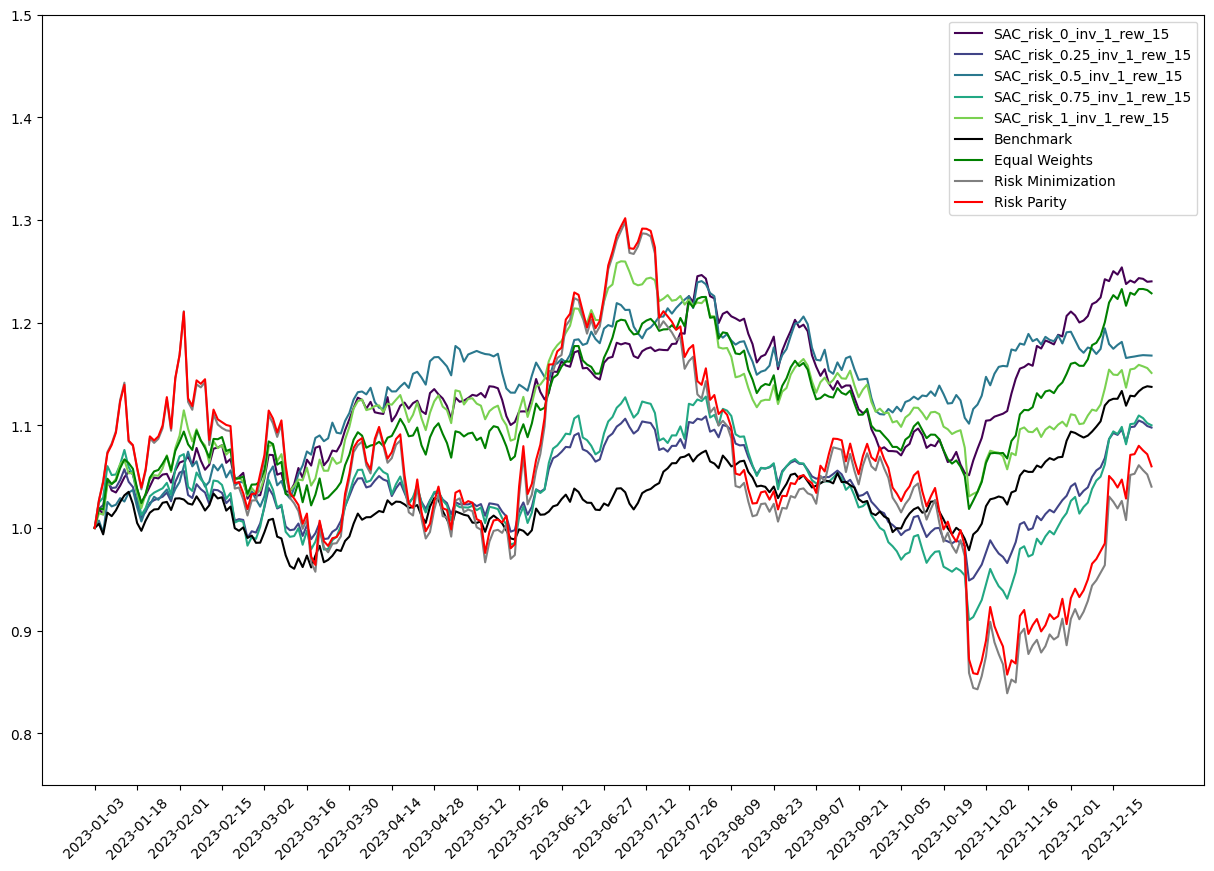

In [6]:
from stable_baselines3 import SAC
from enviroments.main import create_env

eval_env,eval_dates,eval_benchmark,prices = create_env(tickers,'2023-01-01','2023-12-31',investment_period,reward_period,risk_aversion=0.5)

# read models from files at './models'
models = [
    'SAC_risk_0_inv_1_rew_15',
    'SAC_risk_0.25_inv_1_rew_15',
    'SAC_risk_0.5_inv_1_rew_15',
    'SAC_risk_0.75_inv_1_rew_15',
    'SAC_risk_1_inv_1_rew_15',
]

plt.figure(figsize=(15,10))
for idx,model_name in enumerate(models):
    model_path = f'././models/{model_name}.zip'
    model = SAC.load(model_path)
    rewards,portfolio_worths = evaluate_model(model,eval_env)
    plt.plot(eval_dates,portfolio_worths, linestyle='-',label=f'{model_name}', color=plt.cm.viridis(idx/len(models)))

eval_benchmark_relative = eval_benchmark/eval_benchmark[0]
plt.plot(eval_dates,eval_benchmark_relative,linestyle='-',label='Benchmark', color='black')


plt.plot(eval_dates,equal_weights,linestyle='-',label='Equal Weights', color='green')
plt.plot(eval_dates,min_risk,linestyle='-',label='Risk Minimization', color='grey')
plt.plot(eval_dates,risk_parity,linestyle='-',label='Risk Parity', color='red')



plt.xticks(eval_dates[::(len(eval_dates)//25)],rotation=45)
plt.ylim(0.75,1.5)
plt.legend()